# 1. Análisis Exploratorio de Datos (EDA)
Cargar el dataset y realizar un análisis exploratorio básico para entender su estructura y características.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# 2. Resumen del dataset:

In [80]:
# Cantidad de Líneas y Columnas en el Dataset
df.shape

(7043, 21)

In [33]:
# Ver las primeras filas del dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [100]:
# Resumen estadístico de las variables numéricas
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [102]:
# Resumen de las variables categóricas
print(df.describe(include=['O']))

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

In [87]:
columnas_con_na = []

for col in df.columns:
       porcentaje_na = df[col].isnull().mean()
       if(porcentaje_na > 0):
              columnas_con_na.append(col)
columnas_con_na

['TotalCharges']

In [90]:
# porcentaje de NA's con comprehention
columnas_con_na = [col for col in df.columns if df[col].isnull().mean() > 0]
columnas_con_na

['TotalCharges']

In [93]:
df[columnas_con_na].dtypes

TotalCharges    float64
dtype: object

In [96]:
df[columnas_con_na].isnull().mean()

TotalCharges    0.001562
dtype: float64

In [82]:
# Conteo de en la columna TotalCharges
faltantes_TC = df['TotalCharges'].isnull()
faltantes_TC.value_counts()

TotalCharges
False    7032
True       11
Name: count, dtype: int64

In [84]:
# Porcentaje de faltantes de columna TotalCharges
df['TotalCharges'].isnull().mean()

0.001561834445548772

In [39]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Como se distribuye inicialmente la data de la variable a predecir:

In [106]:
columnas_for_cca = [col for col in df.columns if df[col].isnull().mean() < 0.06]
columnas_for_cca

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [111]:
df_cca = df[columnas_for_cca].dropna()
df.shape, df_cca.shape

((7043, 21), (7032, 21))

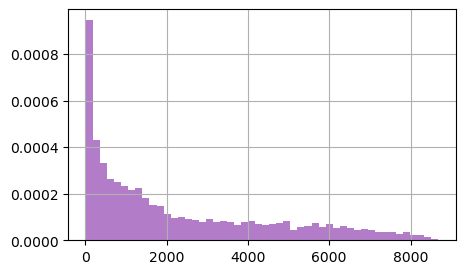

In [114]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)

df['TotalCharges'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.3)
df_cca['TotalCharges'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.3)
plt.show()

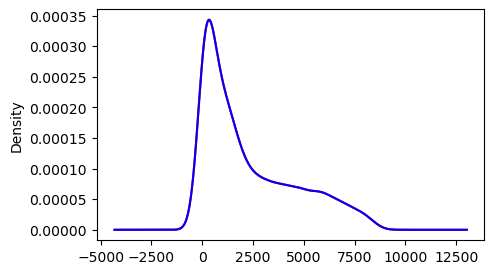

In [117]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)

df['TotalCharges'].plot.density(color='red')
df_cca['TotalCharges'].plot.density(color='blue')
plt.show()

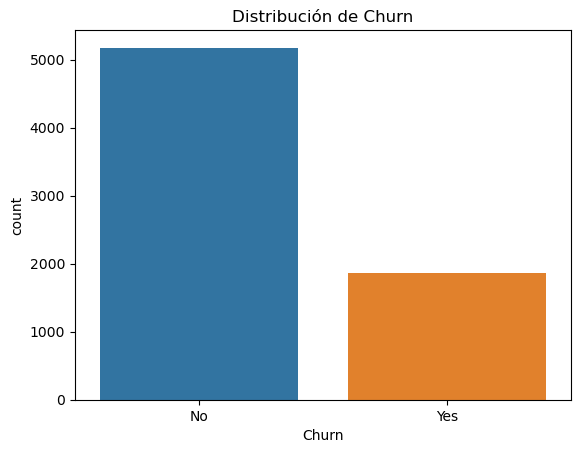

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

# 3. Selección de Variables
Variable a predecir: 'Churn' (categórica)
Variables predictoras: Todas las demás columnas